In [34]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def loss_calc(predicted_row, data_row):
    result = 0
    for i in range(0, len(predicted_row)):
        result += (predicted_row[i] - data_row[i]) ** 2
    result /= len(predicted_row)
    return result

def lin_reg(intercept, slope, input_x):
    return intercept + np.multiply(slope, input_x)

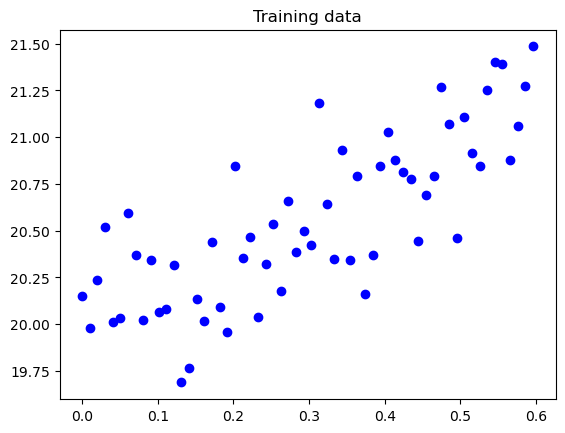

In [35]:
x_csv = []
y_csv = []

with open('/kaggle/input/datalab/lab_1_train.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    itercars = iter(csvreader)
    next(csvreader)
    for row in csvreader:        
        x_csv.append(float(row[1])) 
        y_csv.append(float(row[2]))
        
x = np.array(x_csv)
y = np.array(y_csv)

plt.title("Training data")
plt.plot(x, y, 'bo')

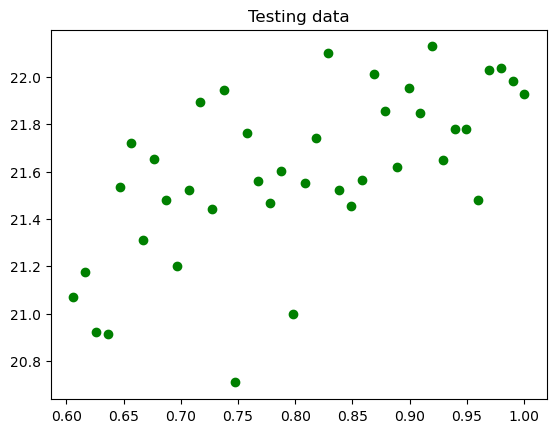

In [36]:
x_csv = []
y_csv = []

with open('/kaggle/input/datalab/lab_1_test.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    itercars = iter(csvreader)
    next(csvreader)
    for row in csvreader:        
        x_csv.append(float(row[1])) 
        y_csv.append(float(row[2]))
        
x_test = np.array(x_csv)
y_test = np.array(y_csv)

plt.title('Testing data')
plt.plot(x_test, y_test, 'go')

In [37]:
def training(rows, learn_rate = 0.001, toler = 0.000001):
    epoch = 0
    delta = 100
    
    x_column = rows[0]
    y_column =  rows[1]

    intercept = np.random.randn(1)
    slope = np.random.randn(1)

    prediction = [lin_reg(intercept, slope, x) for x in x_column]
    loss = loss_calc(y_column, prediction)
   
    while toler < delta:
        prediction = [lin_reg(intercept, slope, x) for x in x_column]
        difference = [(expected - predicted) for (expected, predicted) in zip(y_column, prediction)]

        intercept_derivative = - (2 / len(difference)) * np.sum(difference)
        sum_value = np.dot(x_column, difference)
        slope_derivative = - (2 / len(difference)) * sum_value

        intercept = intercept - learn_rate * intercept_derivative
        slope = slope - learn_rate * slope_derivative

        prediction = [lin_reg(intercept, slope, x) for x in x_column]
        current_loss = loss_calc(y_column, prediction)
        delta = loss - current_loss
        loss = current_loss

        print(f"epoch #{epoch}: intercept = {intercept[0]} slope = {slope[0]} loss = {current_loss[0]}")
        
        epoch += 1

    return {
        "intercept": intercept[0],
        "slope": slope[0],
        "epoch number": epoch,
        "mse loss function": loss[0]
    }
    

epoch #0: intercept = 1.6899354515026939 slope = 1.44040831632499 loss = 339.7621076247715
epoch #1: intercept = 1.7267962818235516 slope = 1.4514250484141142 loss = 338.28363364898576
epoch #2: intercept = 1.7635768249565629 slope = 1.4624171823055816 loss = 336.8116064670107
epoch #3: intercept = 1.8002772561356355 slope = 1.4733847717209965 loss = 335.34599796667317
epoch #4: intercept = 1.8368977502121933 slope = 1.4843278702647031 loss = 333.8867801583872
epoch #5: intercept = 1.8734384816560112 slope = 1.4952465314240415 loss = 332.4339251746196
epoch #6: intercept = 1.9098996245560487 slope = 1.5061408085696026 loss = 330.98740526935825
epoch #7: intercept = 1.94628135262128 slope = 1.5170107549554837 loss = 329.5471928175805
epoch #8: intercept = 1.982583839181525 slope = 1.5278564237195418 loss = 328.1132603147278
epoch #9: intercept = 2.0188072571882745 slope = 1.538677867883648 loss = 326.6855803761792
epoch #10: intercept = 2.0549517792155187 slope = 1.5494751403539402 loss

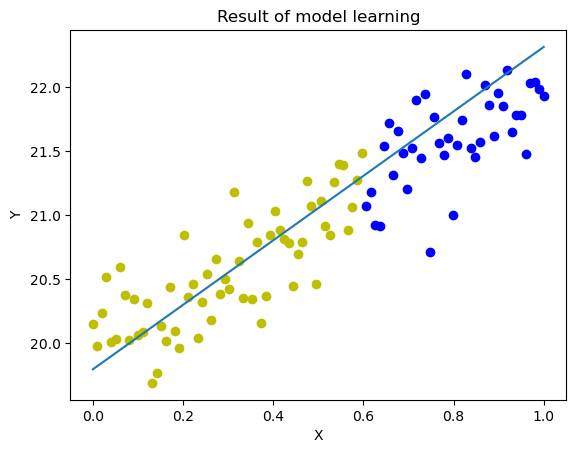

In [38]:
training_model = training([x,y])
training_model

x_train, y_train = list(x), list(y)
x_test, y_test = list(x_test), list(y_test)
prediction = [lin_reg(training_model["intercept"], training_model["slope"], x) for x in x_test]
print(f"loss: {loss_calc(y_test, prediction)}")

plt.title('Result of model learning')
plt.xlabel('X') 
plt.ylabel('Y') 
plt.plot(x_train, y_train, 'yo',
         x_test, y_test, 'bo',
         [0, 1], [lin_reg(training_model["intercept"], training_model["slope"], 0), lin_reg(training_model["intercept"], training_model["slope"], 1)])